### **Root Finding with Safe Newton-Raphson**

In this lab we will:

*   Complete a standard Newton-Raphson code
*   Use the Newton-Raphson method for well-behaved case
*   Use the Newton-Raphson method for a poorly-behaved case
*   Implement safe Newton-Raphson

For the first part of this lab we will define our function as $f(x) = x^3-4x-4$

Plot this function over the interval $x=-2$ to $x=3$


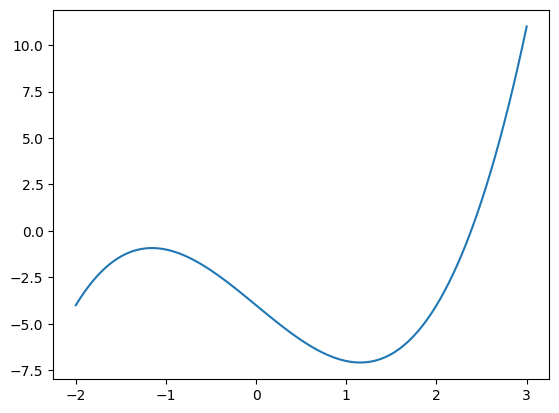

In [1]:
%reset -f
# import what you need
# define the function
# pass a domain through the function (how did we make the domain last time?)

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 4*x -4

xvals = np.linspace(-2, 3, 100)
yvals = [f(x) for x in xvals]

plt.plot(xvals, yvals)

#### **1. Use the Newton-Raphson method for well-behaved case**

Recall that the Newton-Raphson Method is:

$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$

When used several times in succession, this equation can help us find the root of a function, as demonstrated in this GIF: https://de.wikipedia.org/wiki/Datei:NewtonIteration_Ani.gif.

Use this method to find the zero that occurs between $x = 2$ and $x = 3$ using a tolerance of $10^{-8}$ and a starting guess of $x = 2$.

Include a limit on the maximum number of iterations in your function. Define the max to be 20.

Observe the use of an "f-string" to print the output

In [2]:
def df(x):
  return 3*x**2 - 4

def f(x):
  return x**3 - 4*x - 4

maxIterations = 20
tolerance = 1E-8

x = 2 #original guess, will change to root
iterations = 0
while abs(f(x)) > tolerance and iterations < maxIterations:
  x = x - (f(x) / df(x))
  iterations += 1

print('zero found at x = {0:.5f} after {1:0d} iterations'.format(x,iterations))

# Review this alternative print statement that uses an "f-string"
print(f'zero found at x = {"%.5f" % x} after {iterations} iterations')

zero found at x = 2.38298 after 4 iterations
zero found at x = 2.38298 after 4 iterations


#### **2. Use the Newton-Raphson method for a poorly-behaved case**

Let's see what happens if we use a starting guess of $x = 0$
* Print out the current estimate of the root on each iteration
* To print every estimate on one line, you can use this in your loop:  `print(x, end="  ")`

In [3]:
x = 0
iterations = 0
while abs(f(x)) > tolerance and iterations < maxIterations:
  x = x - (f(x) / df(x))
  print(x, end =" ")
  iterations += 1

print('\nThe residual after iterating =', f(x))

-1.0 -2.0 -1.5 -1.0 -2.0 -1.5 -1.0 -2.0 -1.5 -1.0 -2.0 -1.5 -1.0 -2.0 -1.5 -1.0 -2.0 -1.5 -1.0 -2.0 
The residual after iterating = -4.0


* We are getting nowhere

* Explore what is happening by manually plotting out the iteration history. What has happened?

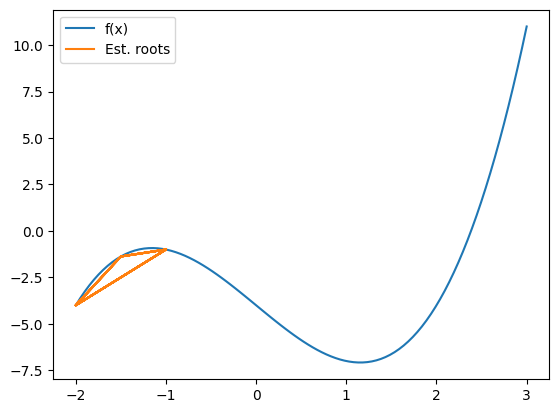

In [4]:
root_iter_x_list = []  # collect root estimates
root_iter_fx_list = []  # collect function vals at root estimates

x = 0
iterations = 0
while abs(f(x)) > tolerance and iterations < maxIterations:
  x = x - (f(x) / df(x))
  root_iter_x_list.append(x)
  root_iter_fx_list.append(f(x))
  iterations += 1

plt.plot(xvals, yvals, label = "f(x)") #original function
plt.plot(root_iter_x_list, root_iter_fx_list, label = "Est. roots") #roots

plt.legend()

#### **3. Implement safe Newton-Raphson**

Now let's take some steps to make sure our Newton-Raphson function is a bit more robust.

We will do this by making a few smaller pieces and assembling them into a larger function that is guarenteed to find the targeted root.

**Step 1: Bracket Check**

Make a function called `bracketCheck` that accepts the inputs `a` and `b` (which are the bounds of the bracket $[a, b]$), the function handle placeholder `f`, and a tolerance `tol` (we will use $10^{-8}$).

Your function should check to see if the bracket is valid, i.e. it satisfies the following conditions:

1. Neither $f(a)$ or $f(b)$ are zero (or, more precisely, neither is smaller than the $10^{-8}$ tolerance)

2. The signs of $f(a)$ and $f(b)$ are opposite (use the np.sign function to compare the two signs.)

Test your code with the bracket $[1, 4]$ and the bracket $[1, 2]$ to make sure it rejects invalid brackets.


In [5]:
def BracketCheck(a, b, function, tolerance):
    
    if abs(f(a)) < tolerance:
        return a
    
    if abs(f(b)) < tolerance:
        return b
    
    if np.sign(f(a)) != np.sign(f(b)):
        print(f"The bracket [{a}, {b}] is valid!")
        return None;
    else:
        print(f"The bracket [{a}, {b}] is INvalid!")
        return True

BracketCheck(1, 4, f, tolerance)
BracketCheck(1, 2, f, tolerance)

The bracket [1, 4] is valid!
The bracket [1, 2] is INvalid!


True

**Step 2: Newton-Raphson Step**

Create a functon called `newtonRaphsonStep` that starts with a bracket and performs a single Newton-Raphson step using the midpoint of the bracket as the starting guess.

Check your funtion with the starting bracket of $[1, 4]$

In [6]:
def newtonRaphsonStep(a, b, f, df, tolerance):
    x = (a + b) / 2
    x_next = x - f(x) / df(x)

    return x_next

newtonRaphsonStep(1, 4, f, df, tolerance)

2.389830508474576

**Step 3: "Safe" alternative when Newton-Rapson fails: Bisection**

Modify the function from step 2 into a new function called `safeNewtonRaphsonStep` to check to see if the guess generated by the Newton-Raphson step has strayed out of the bracket. If it has, perform a bisection step instead.

If the guess generated by Newton-Raphson does not go outside the bracket, tighten the bracket based on the signs of $f(a)$, $f(b)$ and $f(guess)$

In [7]:
def safeNewtonRaphsonStep(a, b, f, df, tolerance):
    x = (a + b) / 2
    x_next = x - f(x) / df(x)

    if x_next < a and x_next > b: #if outside the bracket
        x_next = (a + b) / 2

    if np.sign(f(a)) != np.sign(f(x_next)): #perform a bisection step instead
        b = x_next
    else:
        a = x_next

    return a, b

safeNewtonRaphsonStep(1, 4, f, df, tolerance)

(1, 2.389830508474576)

**Step 4: Complete the function**

Task:

1. Exit function with message if bracket is invalid.
2. Calculate a new guess using Newton-Raphson.
3. Check to see that the new guess generated by the Newton-Raphson iteration does not go outside of the bracket. If it does, use the bisection method for this iteration.

Each iteration should tighten the bracket such that $x$ replaces either $a$ or $b$ as the endpoint of the bracket.

For each iteration print out:


1.   The iteration number
2.   The current bracket
3.   The Newton-Raphson approximation
4.   If neccesary, an alert that the Newton-Raphson approximation leaves the bracket and that the bisection method is being used
5.   The final guess of x for the current iteration

Try your new safe Newton-Raphson Function with the starting bracket $[-3,3]$ (this is not a good bracket, but it will let us test to see if our failure case where we used a starting guess of $0$ will return a failure.)





In [8]:
def safeNewtonRaphson(f, df, a, b, tolerance = 1e-9, maxIterations = 30):
    if abs(f(a)) < tolerance:
        return a
    
    if abs(f(b)) < tolerance:
        return b
    
    if np.sign(f(a)) != np.sign(f(b)):
        print(f"The bracket [{a}, {b}] is valid!")
        #continue

    else:
        print(f"The bracket [{a}, {b}] is INvalid!")
        return None
    
    x = (a + b) / 2
    print(f"The initial guess is x = {x:.4f}")

    for iteration in range(maxIterations):
        print(f"\nIteration: {iteration}")

        if abs(f(x)) < tolerance:
            return x
        
        x_next = x - f(x) / df(x)
        
        print(f"Newton-Raphson Guess: {x_next:.5f}")

        if x_next < a and x_next > b: #if outside the bracket
            print(f"Newton-Raphson is outside of the bracket, using bisection isntead.")
            x_next = (a + b) / 2

        if np.sign(f(a)) != np.sign(f(x_next)): #perform a bisection step instead
            b = x_next
        else:
            a = x_next

        print(f"x guess after iteration {iteration}: {x_next:.5f}")
        print(f"Current Bracket: [{a}, {b}]")

        x = x_next

    print(f"Too many iterations in Newton-Raphson method.")

print(safeNewtonRaphson(-3, 3, 1e-9, 30))

The bracket [-3, 3] is valid!
The initial guess is x = 0.0000

Iteration: 0
Newton-Raphson Guess: -1.00000
x guess after iteration 0: -1.00000
Current Bracket: [-1.0, 3]

Iteration: 1
Newton-Raphson Guess: -2.00000
x guess after iteration 1: -2.00000
Current Bracket: [-2.0, 3]

Iteration: 2
Newton-Raphson Guess: -1.50000
x guess after iteration 2: -1.50000
Current Bracket: [-1.5, 3]

Iteration: 3
Newton-Raphson Guess: -1.00000
x guess after iteration 3: -1.00000
Current Bracket: [-1.0, 3]

Iteration: 4
Newton-Raphson Guess: -2.00000
x guess after iteration 4: -2.00000
Current Bracket: [-2.0, 3]

Iteration: 5
Newton-Raphson Guess: -1.50000
x guess after iteration 5: -1.50000
Current Bracket: [-1.5, 3]

Iteration: 6
Newton-Raphson Guess: -1.00000
x guess after iteration 6: -1.00000
Current Bracket: [-1.0, 3]

Iteration: 7
Newton-Raphson Guess: -2.00000
x guess after iteration 7: -2.00000
Current Bracket: [-2.0, 3]

Iteration: 8
Newton-Raphson Guess: -1.50000
x guess after iteration 8: -1